[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FerneyOAmaya//Photonics/blob/master/MediosElectricos.ipynb)

# Medios eléctricos: Buenos conductores y buenos aislantes

Se presentan las principales características, desde el punto de vista eléctrico, para identificar un buen aislante de un buen conductor. Esto depende del material y de la frecuencia de la onda electromagnetica que se propaga a través de este.

Por:

Ferney Amaya Fernández
https://ferneyoamaya.github.io/


Contenido:
1. Ecuaciones generales.
2. Tangente de pérdidas.
3. Buenos dieléctricos.
4. Buenos conductores.
5. Ejercicio interactivo: dependencia de la frecuencia.

Referencias.

## 1.Ecuaciones generales.

La ecuación para el campo eléctrico incidente de una onda polarizada linealmente para medios dieléctricos y conductores puede expresarse como:
<br><br>
$$\large E(z,t) = e^{-\alpha z} cos(\omega t - \beta z) \, [V/m]$$<br>
$$\large \gamma = \alpha + j\, \beta \, [1/m]$$ <br>
donde:
$$\alpha = \frac{\omega \sqrt{\mu \epsilon}}{\sqrt{2}} \left(\sqrt{1 + \left(\frac{\sigma}{\omega \epsilon}\right)^2}-1 \right)^{1/2} \, [Np/m]$$

$$\beta = \frac{\omega \sqrt{\mu \epsilon}}{\sqrt{2}} \left(\sqrt{1 + \left(\frac{\sigma}{\omega \epsilon}\right)^2}+1 \right)^{1/2} \, [rad/m]$$

- $\gamma$ es la constante de propagación de la onda [1/m] <br>
- $\alpha$ es la constante de atenuación de la onda [1/m] <br>
- $\beta$ es la constante de fase de la onda [rad/m] 
- $\omega$ es la frecuencia angular de la señal [rad/s] <br>
- $\sigma$ es la conductividad [S/m] <br>
- $\epsilon$ es la permitividad del medio [F/m] <br>
- $\mu$ es la permeabilidad del medio [H/m]

NOTA 1: Np = Neper. <br>
NOTA 2: S = Siemen, $S = 1/\Omega$ .

La permitividad del material $\epsilon$ se calcula a partir de la permitividad del vacío $\epsilon_0$ y la permitividad relativa del material $\epsilon_r$ que se encuentra tabulada disponible en la web o en libros especializados:

$$\epsilon = \epsilon_0 \cdot \epsilon_r$$<br>

donde la permitividad del vacío:

$$\epsilon_0 = 8.8542 \times 10^{-12} \, [F/m]$$<br>


In [ ]:
e0 = 8.8542e-12;

La permeabilidad del material $\mu$ se calcula a partir de la permeabilidad del vacío $\mu_0$ y la permeabilidad relativa del material $\mu_r$ que se encuentra tabulada disponible en la web o en libros especializados:

$$\mu = \mu_0 \cdot \mu_r$$<br>

donde la permeabilidad del vacío:

$$\mu_0 = 4\pi \times \, 10^{-7} = 1.2566 \times 10^{-6} \, [H/m]  $$<br>


In [ ]:
u0 = 1.2566e-6;


Otras ecuaciones que pueden emplearse para todos los tipos de materiales son:


$$\large v = \lambda \, f = \frac{\omega}{\beta} \, [m/s]$$<br>
$$\large \beta = \frac{2 \, \pi}{\lambda} \, [rad/m]$$<br>
$$\large \delta = \frac{1}{\alpha} \, [m]$$<br>
$$\large \sigma = \frac{1}{\rho} \, [S/m]$$
donde: <br>

- $v$ es la velocidad de propagación de la onda [m/s]<br>
- $\lambda$ es la longitud de onda [m] <br>
- f es la frecuencia de la onda [Hz] <br>
- $\delta$ es la profundidad de penetración [m] <br>
- $\rho$ es la resistividad del material [$\Omega$.m] <br>

## 2.Tangente de pérdidas.

Para calcular las características de propagación de las ondas, primero debe determinarse si el medio se comporta como buen dieléctrico o buen conductor.
Esto se realiza calculando la **tangente de pérdidas**:
$$\large tan \, \delta = \frac{\sigma}{\omega \epsilon}$$
El valor de la tangente de perdidas determinará el comportamiento del material, si:
- $tan \, \delta > 100$ el material se comporta como buen conductor <br>
- $tan \, \delta < 1/100$ el material se comporta como buen dieléctrico <br>
- En otro caso el material se comporta como buen semiconductor.

## 3.Buenos dieléctricos

En un buen dieléctrico se cumple $tan \, \delta < 1/100$<br>

Por ejemplo, una onda de RF a través de polietileno:
- Frecuencia 1 kHz
- $\epsilon_r = 2.6$
- $\mu_r = 1$
- $tand = 0.20 \times 10^{-3}$

Se definen las variables en Python:

In [ ]:
fd = 1e3;
erd = 1;
urd = 1;
tandd = 0.2e-3;

Algunos parámetros de la onda:

In [ ]:
omegad = 2*np.pi*fd;
ed = e0*erd;
ud = u0*urd;
sigmad = tandd*omegad*ed;
alphad = omegad*np.sqrt(ud*ed/2)*np.sqrt(np.sqrt(1+tandd**2)-1);
betad  = omegad*np.sqrt(ud*ed/2)*np.sqrt(np.sqrt(1+tandd**2)+1);
lambdad = 2*np.pi/betad;
vd = lambdad*fd;

print('sigma  : %.3e S/m' % sigmad)
print('alpha  : %.3e 1/m' % alphad)
print('beta   : %.3e rad/m' % betad)
print('lambda : %.3e m' % lambdad)
print('v      : %.3e m/s' % vd)

sigma  : 1.113e-11 S/m
alpha  : 2.096e-09 1/m
beta   : 2.096e-05 rad/m
lambda : 2.998e+05 m
v      : 2.998e+08 m/s


La gráfica del campo eléctrico en función de la distancia:

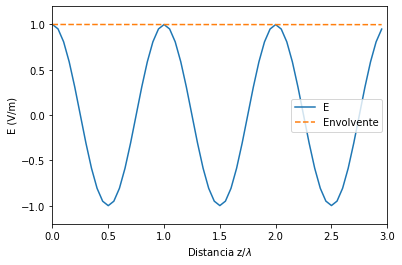

In [ ]:
zd = np.arange(0,3*lambdad,lambdad/20);
Envd = np.exp(-alphad*zd);
Ezpd = Envd*np.cos(-betad*zd);
plt.axis([0, 3, -1.2, 1.2])
plt.xlabel('Distancia z/$\lambda$')
plt.ylabel('E (V/m)')
plt.plot(zd/lambdad, Ezpd);
plt.plot(zd/lambdad, Envd,'--');
plt.legend(['E','Envolvente'])

## 4.Buenos conductores

En un buen conductor se cumple $tan \, \delta > 100$.

Por ejemplo, una onda de RF propagándose a través del cobre:
- Frecuencia 1 GHz
- $\epsilon_r = 1$
- $\mu_r = 1$
- $\sigma = 5.8 \times 10^7$ [S/m]

A continuación se graficará el Campo Eléctrico y se calcularán algunos valores de la onda.

Para esto se inicializa la librería **numpy** y se definen las variables en Python:

In [ ]:
import numpy as np
fc = 1e9;
erc = 1;
urc = 1;
sigmac = 5.8e7;

Se calculan algunos parámetros de la onda:

In [ ]:
omegac = 2*np.pi*fc;
ec = e0*erc;
uc = u0*urc;
tandc = sigmac/(omegac*ec);
alphac = omegac*np.sqrt(uc*ec/2)*np.sqrt(np.sqrt(1+tandc**2)-1);
betac  = omegac*np.sqrt(uc*ec/2)*np.sqrt(np.sqrt(1+tandc**2)+1);
lambdac = 2*np.pi/betac;
vc = lambdac*fc;

print('tand   : %.3e' % tandc)
print('alpha  : %.3e 1/m' % alphac)
print('beta   : %.3e rad/m' % betac)
print('lambda : %.3e m' % lambdac)
print('v      : %.3e m/s' % vc)

tand   : 1.043e+09
alpha  : 4.785e+05 1/m
beta   : 4.785e+05 rad/m
lambda : 1.313e-05 m
v      : 1.313e+04 m/s


La gráfica del campo eléctrico en función de la distancia:

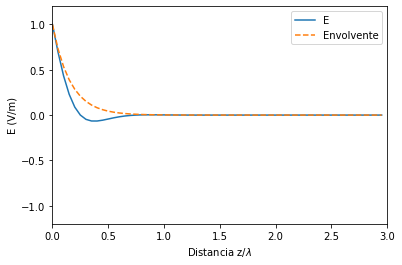

In [ ]:
import matplotlib.pyplot as plt

zc = np.arange(0,3*lambdac,lambdac/20);
Envc = np.exp(-alphac*zc)
Ezpc = Envc*np.cos(-betac*zc);
plt.axis([0, 3, -1.2, 1.2])
plt.xlabel('Distancia z/$\lambda$')
plt.ylabel('E (V/m)')
plt.plot(zc/lambdac, Ezpc);
plt.plot(zc/lambdac, Envc,'--');
plt.legend(['E','Envolvente'])

## 5.Ejercicio interactivo: dependencia de la frecuencia.

Se realizará un ejercicio interactivo. Se variará la frecuencia de la onda que atravieza un conductor como el cobre, para observar lo que ocurre.

Características del cobre:
- $\epsilon_r = 1$
- $\mu_r = 1$
- $\sigma = 5.8 \times 10^7$ [S/m]




tand   : 1.0415


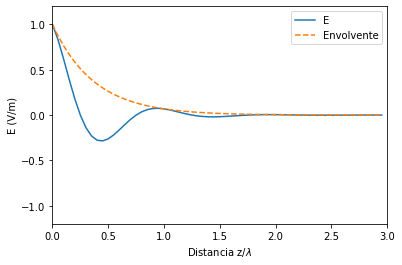

In [ ]:
frecuencia_PHz = 1001 #@param {type:"slider", min:1, max:10000, step:1000}
omegai = 2*np.pi*frecuencia_PHz*1e15;
tandi = sigmac/(omegai*ec);
alphai = omegai*np.sqrt(uc*ec/2)*np.sqrt(np.sqrt(1+tandi**2)-1);
betai  = omegai*np.sqrt(uc*ec/2)*np.sqrt(np.sqrt(1+tandi**2)+1);
lambdai = 2*np.pi/betai;
zi = np.arange(0,3*lambdai,lambdai/20);
Envi = np.exp(-alphai*zi)
Ezpi = Envi*np.cos(-betai*zi);
plt.axis([0, 3, -1.2, 1.2])
plt.xlabel('Distancia z/$\lambda$'); plt.ylabel('E (V/m)')
plt.plot(zi/lambdai, Ezpi);
plt.plot(zi/lambdai, Envi,'--');
plt.legend(['E','Envolvente'])
print('tand   : %.4f' % tandi)

## Referencias

- Engineering Electromagnetic Fields and Waves (Inglés) 2nd Edición. Carl T. A. Johnk.